# Spectogram Speech Detector using CNNs

Classify spectrograms into two categories — "Human Speech" and "No Human Speech."

In [1]:
#dowload dependencis
!pip install librosa
!pip install soundata
#download librespeech (human)
!mkdir -p data/librispeech
# Download the train-clean-100 subset (approx. 6GB)
!wget -P data/librispeech https://www.openslr.org/resources/12/train-clean-100.tar.gz
# Extract the dataset
!tar -xvzf data/librispeech/train-clean-100.tar.gz -C data/librispeech

Streaming output truncated to the last 5000 lines.
LibriSpeech/train-clean-100/2136/5143/2136-5143-0024.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0012.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0044.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0003.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0010.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0025.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0043.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0004.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0026.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0015.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0032.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0027.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0039.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0020.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0023.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0007.flac
LibriSpeech/train-cle

In [2]:
# Import depedencies
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import glob
import numpy as np
import gc
from IPython.display import Audio
import soundata

Sample audio from the speech dataset

In [3]:
# Provide the path to your audio file (you can upload it to Colab or use a URL)
audio_file_path = '/content/data/librispeech/LibriSpeech/train-clean-100/103/1240/103-1240-0000.flac'  # Or use a URL like 'http://example.com/audio.flac'

# Display the audio player
Audio(audio_file_path)

# Convert to spectogram

In [4]:
# Define the path to the LibriSpeech dataset folder
audio_files = glob.glob('/content/data/librispeech/LibriSpeech/train-clean-100/**/*.flac', recursive=True)


# Define the path to your folder containing the audio files (e.g., libresimages)
images_folder = '/content/data/libresimages/'

os.makedirs(images_folder, exist_ok=True)

# Loop through each audio file and generate/save its spectrogram
for index, audio_file  in enumerate(audio_files):

    if index > 2000:
      break


    # Load the audio file
    y, sr = librosa.load(audio_file, sr=16000, duration=3)

    # Generate the spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

    # Convert to log scale (dB)
    S_db = librosa.power_to_db(S, ref=np.max)

    # Create the plot (no display)
    plt.figure(figsize=(10, 4))

    # Generate the spectrogram without displaying it
    librosa.display.specshow(S_db, x_axis='time', y_axis='mel', sr=sr)

    plt.axis('off')  # Hide the axis labels
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove extra space around the plot


    # Save the spectrogram image
    # Use the audio file name (without extension) to save the image
    plt.savefig(os.path.join(images_folder, str(index) + ".png"), bbox_inches='tight', pad_inches=0)

    # Close the plot to free memory
    plt.close()

    print(f"Saved spectrogram for", str(index), ".png")
    del y, S, S_db

Saved spectrogram for 0 .png
Saved spectrogram for 1 .png
Saved spectrogram for 2 .png
Saved spectrogram for 3 .png
Saved spectrogram for 4 .png
Saved spectrogram for 5 .png
Saved spectrogram for 6 .png
Saved spectrogram for 7 .png
Saved spectrogram for 8 .png
Saved spectrogram for 9 .png
Saved spectrogram for 10 .png
Saved spectrogram for 11 .png
Saved spectrogram for 12 .png
Saved spectrogram for 13 .png
Saved spectrogram for 14 .png
Saved spectrogram for 15 .png
Saved spectrogram for 16 .png
Saved spectrogram for 17 .png
Saved spectrogram for 18 .png
Saved spectrogram for 19 .png
Saved spectrogram for 20 .png
Saved spectrogram for 21 .png
Saved spectrogram for 22 .png
Saved spectrogram for 23 .png
Saved spectrogram for 24 .png
Saved spectrogram for 25 .png
Saved spectrogram for 26 .png
Saved spectrogram for 27 .png
Saved spectrogram for 28 .png
Saved spectrogram for 29 .png
Saved spectrogram for 30 .png
Saved spectrogram for 31 .png
Saved spectrogram for 32 .png
Saved spectrogram fo

In [5]:
# Download UrbanSound8K (non-speech sounds) for data, we can add more datasets in the future
os.makedirs('/content/data/ubansound/', exist_ok=True)

non_speech = soundata.initialize('urbansound8k', data_home='/content/data/ubansound/')
non_speech.download()  # download the dataset
non_speech.validate()  # validate that all the expected files are there

5.61GB [04:40, 21.5MB/s]                            
1.15MB [00:01, 888kB/s]                            
100%|██████████| 8732/8732 [00:35<00:00, 242.57it/s]


({'metadata': {}, 'clips': {}}, {'metadata': {}, 'clips': {}})

Sample audio from non-speech dataset

In [6]:
Audio("/content/data/ubansound/audio/fold1/103074-7-4-2.wav")

In [7]:
%reset -f

In [8]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import glob
import numpy as np
import gc

# Define the path to the LibriSpeech dataset folder
audio_files = glob.glob('/content/data/ubansound/audio/**/*.wav', recursive=True)


# Define the path to your folder containing the audio files (e.g., libresimages)
images_folder = '/content/data/urbansound_images/'

os.makedirs(images_folder, exist_ok=True)


# Loop through each audio file and generate/save its spectrogram
for index, audio_file  in enumerate(audio_files):

    name = os.path.basename(audio_file)
    arr = name.split('-')

    if arr[1] == 2 or arr[1] == 9:
        continue

    if index > 2000:
      break


    # Load the audio file
    y, sr = librosa.load(audio_file, sr=16000, duration=3)
    print(sr)
    # Generate the spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

    # Convert to log scale (dB)
    S_db = librosa.power_to_db(S, ref=np.max)

    # Create the plot (no display)
    plt.figure(figsize=(10, 4))

    # Generate the spectrogram without displaying it
    librosa.display.specshow(S_db, x_axis='time', y_axis='mel', sr=sr)

    plt.axis('off')  # Hide the axis labels
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove extra space around the plot


    # Save the spectrogram image
    # Use the audio file name (without extension) to save the image
    plt.savefig(os.path.join(images_folder, str(index) + ".png"), bbox_inches='tight', pad_inches=0)

    # Close the plot to free memory
    plt.close()

    print(f"Saved spectrogram for", str(index), ".png")

    del y, S, S_db

16000
Saved spectrogram for 0 .png
16000
Saved spectrogram for 1 .png
16000
Saved spectrogram for 2 .png
16000
Saved spectrogram for 3 .png
16000
Saved spectrogram for 4 .png
16000
Saved spectrogram for 5 .png
16000
Saved spectrogram for 6 .png
16000
Saved spectrogram for 7 .png
16000
Saved spectrogram for 8 .png
16000
Saved spectrogram for 9 .png
16000
Saved spectrogram for 10 .png
16000
Saved spectrogram for 11 .png
16000
Saved spectrogram for 12 .png
16000
Saved spectrogram for 13 .png
16000
Saved spectrogram for 14 .png
16000
Saved spectrogram for 15 .png
16000
Saved spectrogram for 16 .png
16000
Saved spectrogram for 17 .png
16000
Saved spectrogram for 18 .png
16000
Saved spectrogram for 19 .png
16000
Saved spectrogram for 20 .png
16000
Saved spectrogram for 21 .png
16000
Saved spectrogram for 22 .png
16000
Saved spectrogram for 23 .png
16000
Saved spectrogram for 24 .png
16000
Saved spectrogram for 25 .png
16000
Saved spectrogram for 26 .png
16000
Saved spectrogram for 27 .png
16

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1600
  warnings.warn(


 .png
16000
Saved spectrogram for 1481 .png
16000
Saved spectrogram for 1482 .png
16000
Saved spectrogram for 1483 .png
16000
Saved spectrogram for 1484 .png
16000
Saved spectrogram for 1485 .png
16000
Saved spectrogram for 1486 .png
16000
Saved spectrogram for 1487 .png
16000
Saved spectrogram for 1488 .png
16000
Saved spectrogram for 1489 .png
16000
Saved spectrogram for 1490 .png
16000
Saved spectrogram for 1491 .png
16000
Saved spectrogram for 1492 .png
16000
Saved spectrogram for 1493 .png
16000
Saved spectrogram for 1494 .png
16000
Saved spectrogram for 1495 .png
16000
Saved spectrogram for 1496 .png
16000
Saved spectrogram for 1497 .png
16000
Saved spectrogram for 1498 .png
16000
Saved spectrogram for 1499 .png
16000
Saved spectrogram for 1500 .png
16000
Saved spectrogram for 1501 .png
16000
Saved spectrogram for 1502 .png
16000
Saved spectrogram for 1503 .png
16000
Saved spectrogram for 1504 .png
16000
Saved spectrogram for 1505 .png
16000
Saved spectrogram for 1506 .png
16000


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=960
  warnings.warn(


Saved spectrogram for 1811 .png
16000
Saved spectrogram for 1812 .png
16000
Saved spectrogram for 1813 .png
16000
Saved spectrogram for 1814 .png
16000
Saved spectrogram for 1815 .png
16000
Saved spectrogram for 1816 .png
16000
Saved spectrogram for 1817 .png
16000
Saved spectrogram for 1818 .png
16000
Saved spectrogram for 1819 .png
16000
Saved spectrogram for 1820 .png
16000
Saved spectrogram for 1821 .png
16000
Saved spectrogram for 1822 .png
16000
Saved spectrogram for 1823 .png
16000
Saved spectrogram for 1824 .png
16000
Saved spectrogram for 1825 .png
16000
Saved spectrogram for 1826 .png
16000
Saved spectrogram for 1827 .png
16000
Saved spectrogram for 1828 .png
16000
Saved spectrogram for 1829 .png
16000
Saved spectrogram for 1830 .png
16000
Saved spectrogram for 1831 .png
16000
Saved spectrogram for 1832 .png
16000
Saved spectrogram for 1833 .png
16000
Saved spectrogram for 1834 .png
16000
Saved spectrogram for 1835 .png
16000
Saved spectrogram for 1836 .png
16000
Saved spectr

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=800
  warnings.warn(


Saved spectrogram for 1873 .png
16000
Saved spectrogram for 1874 .png
16000
Saved spectrogram for 1875 .png
16000
Saved spectrogram for 1876 .png
16000
Saved spectrogram for 1877 .png
16000
Saved spectrogram for 1878 .png
16000
Saved spectrogram for 1879 .png
16000
Saved spectrogram for 1880 .png
16000
Saved spectrogram for 1881 .png
16000
Saved spectrogram for 1882 .png
16000
Saved spectrogram for 1883 .png
16000
Saved spectrogram for 1884 .png
16000
Saved spectrogram for 1885 .png
16000
Saved spectrogram for 1886 .png
16000
Saved spectrogram for 1887 .png
16000
Saved spectrogram for 1888 .png
16000
Saved spectrogram for 1889 .png
16000
Saved spectrogram for 1890 .png
16000
Saved spectrogram for 1891 .png
16000
Saved spectrogram for 1892 .png
16000
Saved spectrogram for 1893 .png
16000
Saved spectrogram for 1894 .png
16000
Saved spectrogram for 1895 .png
16000
Saved spectrogram for 1896 .png
16000
Saved spectrogram for 1897 .png
16000
Saved spectrogram for 1898 .png
16000
Saved spectr

Rename folders and compile

In [9]:
import os
import shutil

folders_to_rename = {
    "libresimages": "human",
    "urbansound_images": "non_human"
}
compiled_folder = "/content/data/images"
os.makedirs(compiled_folder, exist_ok=True)

for old_name, new_name in folders_to_rename.items():
    old_path = os.path.join("/content/data", old_name)
    new_path = os.path.join("/content/data", new_name)

    if os.path.exists(old_path):
        os.rename(old_path, new_path)
        print(f"Renamed {old_name} to {new_name}")
    else:
        print(f"{old_name} does not exist.")

    shutil.move(new_path, compiled_folder)

Renamed libresimages to human
Renamed urbansound_images to non_human


## Training A CNN to detect the images

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
import torch.nn as nn
import torch.optim as optim

In [11]:
# Directory for your images
data_dir = '/content/data/images'

# Define transforms for the dataset
transform = transforms.Compose([
    transforms.Resize((128, 128)),        # Resize images to a fixed size
    transforms.Grayscale(num_output_channels=3),  # Convert to 3 channels
    transforms.ToTensor(),                # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Create dataset using ImageFolder with is_valid_file to filter out unwanted files
dataset = datasets.ImageFolder(root=data_dir, transform=transform)


# Split dataset into training and validation
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create DataLoader for batching and shuffling the data
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# You can iterate over the DataLoader like so:
for inputs, labels in train_loader:
    print(inputs.shape)  # Shape: (batch_size, channels, height, width)
    print(labels)        # Labels: 0 for human_speech, 1 for non_human_speech
    break  # Just to see one batch for demonstration

torch.Size([32, 3, 128, 128])
tensor([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 1])


In [12]:
import torch.nn as nn
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Define CNN layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)  # First convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # Second convolutional layer
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling layer
        self.fc1 = nn.Linear(64 * 32 * 32, 512)  # Fully connected layer
        self.fc2 = nn.Linear(512, 2)  # Output layer (2 classes: human speech, non-human speech)

    def forward(self, x):
        # Apply convolutional layers followed by ReLU activation and max pooling
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))

        # Flatten the tensor before passing it to the fully connected layers
        x = x.view(-1, 64 * 32 * 32)

        # Fully connected layers with ReLU activation
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)

        return x

# Initialize the model
model = CNN()

In [13]:
# Loss function (Cross-Entropy Loss for classification)
criterion = nn.CrossEntropyLoss()

# Optimizer (Adam optimizer)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [14]:
# Training loop
epochs = 5

for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for inputs, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

    # Calculate accuracy
    accuracy = 100 * correct_preds / total_preds
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}, Accuracy: {accuracy}%")


Epoch 1/5, Loss: 0.2035184580254101, Accuracy: 95.18900343642612%
Epoch 2/5, Loss: 0.005956809303473948, Accuracy: 99.78131833801937%
Epoch 3/5, Loss: 0.0012055623871926608, Accuracy: 100.0%
Epoch 4/5, Loss: 0.0002901567465812464, Accuracy: 100.0%
Epoch 5/5, Loss: 0.00010229741183318783, Accuracy: 100.0%


In [15]:
# Validation loop
model.eval()  # Set the model to evaluation mode
correct_preds = 0
total_preds = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        # Forward pass
        outputs = model(inputs)

        # Get the predicted class
        _, predicted = torch.max(outputs, 1)

        # Statistics
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

# Calculate accuracy
val_accuracy = 100 * correct_preds / total_preds
print(f"Validation Accuracy: {val_accuracy}%")

Validation Accuracy: 99.87515605493134%


In [16]:
torch.save(model.state_dict(), 'CNN_weights_5epochs.pth')

In [21]:
# prompt: calculate the precision, recall, and F1 score of the model

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F


# Evaluation loop for precision, recall, and F1-score
true_positives = 0
false_positives = 0
false_negatives = 0

with torch.no_grad():
    for inputs, labels in val_00loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        for i in range(len(labels)):
            if labels[i] == 1 and predicted[i] == 1:
                true_positives += 1
            elif labels[i] == 0 and predicted[i] == 1:
                false_positives += 1
            elif labels[i] == 1 and predicted[i] == 0:
                false_negatives += 1

precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Precision: 1.0
Recall: 0.9972826086956522
F1 Score: 0.998639455782313


## Advance: Examining the Kernels

In [17]:
kernels = model.conv1.weight.data  # Shape: (out_channels, in_channels, height, width)
print(f"Kernels shape: {kernels.shape}")

Kernels shape: torch.Size([32, 3, 3, 3])


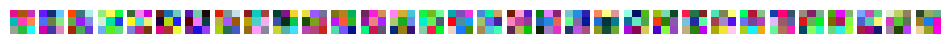

In [18]:
# Visualize kernels for RGB input
num_kernels = kernels.shape[0]
plt.figure(figsize=(12, 12))
for i in range(num_kernels):
    kernel = kernels[i].cpu().numpy()  # Convert to NumPy
    kernel = (kernel - kernel.min()) / (kernel.max() - kernel.min())  # Normalize for display
    kernel = kernel.transpose(1, 2, 0)  # Rearrange to (H, W, C)
    plt.subplot(1, num_kernels, i + 1)
    plt.imshow(kernel)
    plt.axis('off')
plt.show()


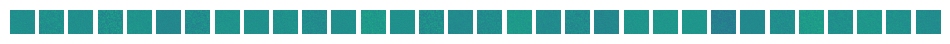

In [19]:
# Sample input image
input_image = torch.randn(1, 3, 128, 128)  # (batch_size, channels, height, width)

# Pass through the first convolutional layer
with torch.no_grad():
    feature_maps = model.conv1(input_image)  # Shape: (batch_size, out_channels, height, width)

# Visualize feature maps
num_feature_maps = feature_maps.shape[1]
plt.figure(figsize=(12, 12))
for i in range(num_feature_maps):
    plt.subplot(1, num_feature_maps, i + 1)
    plt.imshow(feature_maps[0, i].cpu(), cmap='viridis')  # Plot feature map
    plt.axis('off')
plt.show()


In [20]:
from google.colab import files

# Save the weights
torch.save(model.state_dict(), "cnn_weights.pth")

# Download the weights
files.download("cnn_weights.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>